Go to POI POI_3 ...
Position and counts at peak after refocus: (6.067, 45.890, -7.257) µm,  σ= (0.178, 0.335, 0.672) µm, peak cnts: 5.80E+04
Start measurements for orientation 1 ...
Performing Rabi measurement: POI_3_ornt_1_Rabi with 1000000.0 sweeps


 ... rabi:   0%|          | 0/1000000.0 [00:00<?, ?sweeps/s]

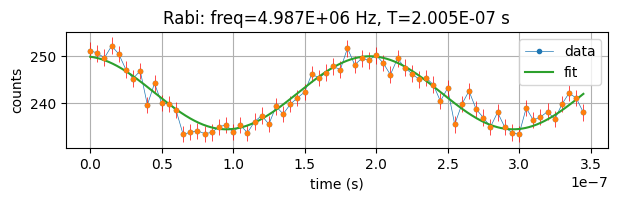

Performing ODMR measurement: POI_3_ornt_1_ODMR with 1000000.0 sweeps


 ... pulsedODMR:   0%|          | 0/1000000.0 [00:00<?, ?sweeps/s]

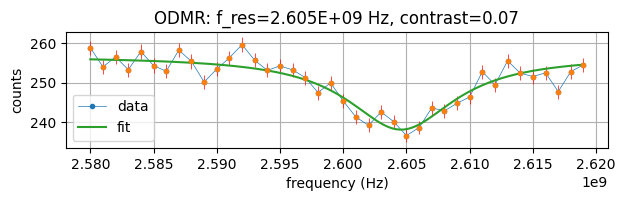

Skipping 2nd Rabi measurement.
Performing Hahn echo with 4000000.0 sweeps ...


 ... hahn_echo:   0%|          | 0/4000000.0 [00:00<?, ?sweeps/s]

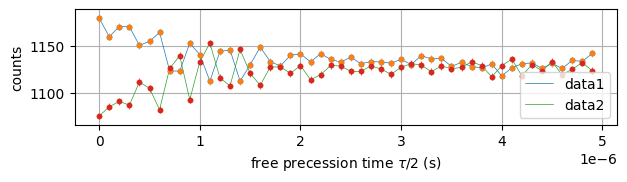

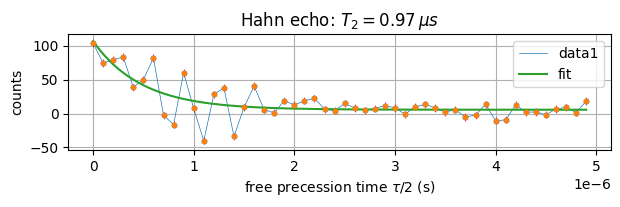

Performing XY8 order scan with 4000000.0 sweeps ...


 ... xy8_order:   0%|          | 0/4000000.0 [00:00<?, ?sweeps/s]

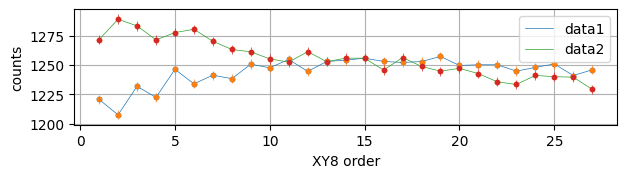

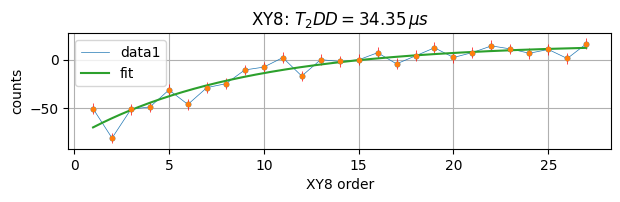

Performing Ramsey with 4000000.0 sweeps ...


 ... ramsey:   0%|          | 0/4000000.0 [00:00<?, ?sweeps/s]

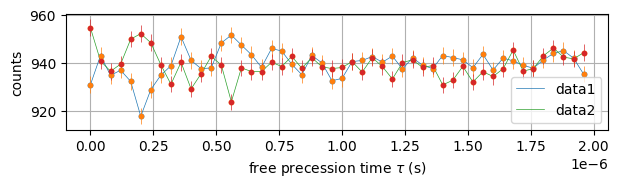

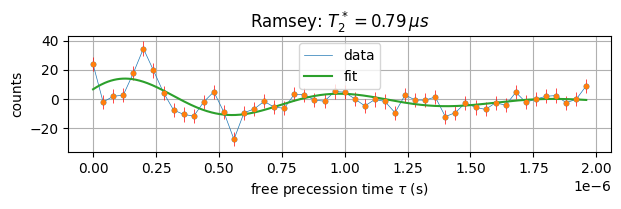

Go to POI POI_6 ...
Position and counts at peak after refocus: (9.318, 51.519, -6.986) µm,  σ= (0.159, 0.386, 0.702) µm, peak cnts: 7.81E+04
Start measurements for orientation 1 ...
Performing Rabi measurement: POI_6_ornt_1_Rabi with 1000000.0 sweeps


 ... rabi:   0%|          | 0/1000000.0 [00:00<?, ?sweeps/s]

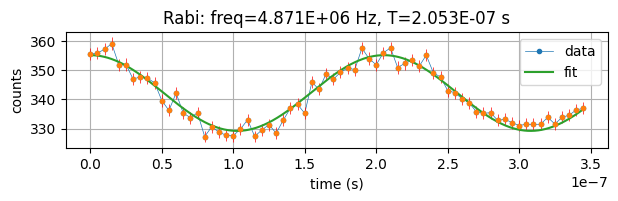

Performing ODMR measurement: POI_6_ornt_1_ODMR with 1000000.0 sweeps


 ... pulsedODMR:   0%|          | 0/1000000.0 [00:00<?, ?sweeps/s]

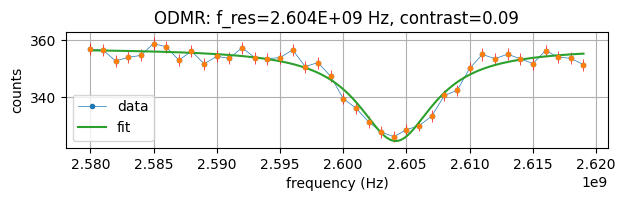

Skipping 2nd Rabi measurement.
Performing Hahn echo with 4000000.0 sweeps ...


 ... hahn_echo:   0%|          | 0/4000000.0 [00:00<?, ?sweeps/s]

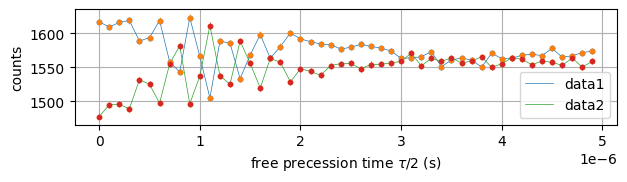

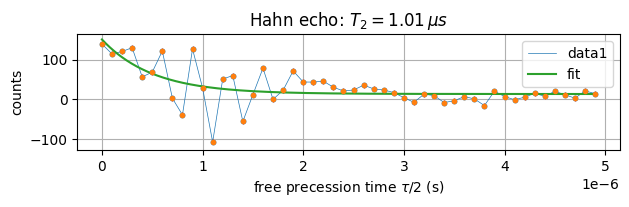

Performing XY8 order scan with 4000000.0 sweeps ...


 ... xy8_order:   0%|          | 0/4000000.0 [00:00<?, ?sweeps/s]

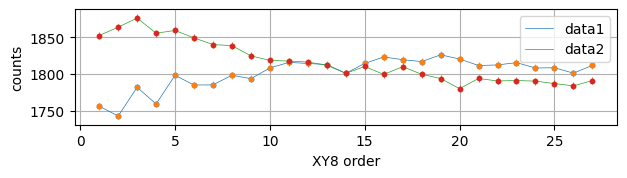

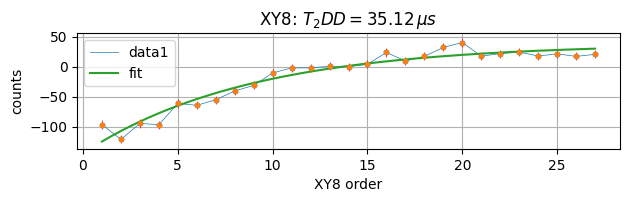

Performing Ramsey with 4000000.0 sweeps ...


 ... ramsey:   0%|          | 0/4000000.0 [00:00<?, ?sweeps/s]

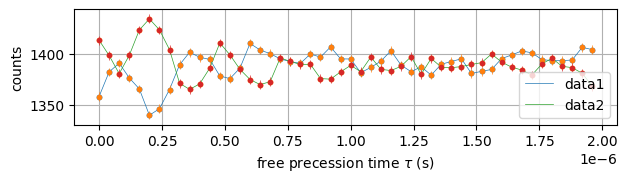

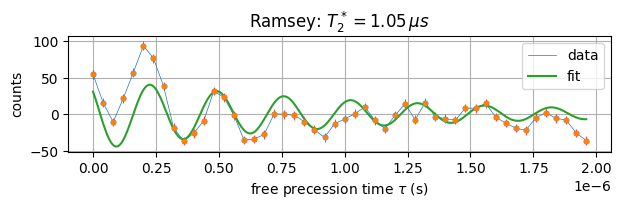

All POIs measured successfully.
+-------+-------------+--------------+------------+-----------+----------------+-----------+-----------------+-------------+------------+------------+----------+-------------+---------------+----------+-----------------+------------+------------+------------+----------+-------------+------------------+-------------+-------------------+---------------+--------------+--------------+------------+---------------+-------------+---------+----------+-------------+------------+---------+---------+------------+----------------+----------+------------+---------------+
|  POI  | Orientation | Start Counts | End Counts | Elapsed_s | Rabi Freq (Hz) | ± FreqErr | Rabi Period (s) | ± PeriodErr | Rabi Contr | ± ContrErr | Rabi Rsq | Rabi RedChi | ODMR Ctr (Hz) | ± CtrErr | ODMR Sigma (Hz) | ± SigmaErr | ODMR Contr | ± ContrErr | ODMR Rsq | ODMR RedChi | Rabi Freq 2 (Hz) | ± FreqErr 2 | Rabi Period 2 (s) | ± PeriodErr 2 | Rabi Contr 2 | ± ContrErr 2 | Rabi Rsq 2 | Rabi R

In [6]:
import datetime
import os
import sys
import time
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate  # pip install tabulate

from qudi.util.network import netobtain
import importlib
sys.path.append('../xq1i')
import libxq1i
importlib.reload(libxq1i)

confocal2 = libxq1i.xq1i(pulsed_master_logic, pulsed_measurement_logic, sequence_generator_logic)

# ------------------------------------------------------------------
# 1) SELECT WHICH MEASUREMENTS TO PERFORM + NUMBER OF SWEEPS
# ------------------------------------------------------------------
selected_routines = {
    "Rabi": {
        "enabled": True,
        "sweeps": 1e6
    },
    "ODMR": {
        "enabled": True,
        "sweeps": 1e6
    },
    "HahnEcho": {
        "enabled": True,
        "sweeps": 4e6
    },
    "XY8": {
        "enabled": True,
        "sweeps": 4e6
    },
    "Ramsey": {
        "enabled": True,
        "sweeps": 4e6
    },
}

# ------------------------------------------------------------------
# 2) SETUP: Folder Creation, Orientation Props, POI List
# ------------------------------------------------------------------
results_root = "results"
timestamp_str = datetime.datetime.now().strftime('%Y%m%d_%H%M')
run_folder_name = f"characterization_run_{timestamp_str}"
run_folder = os.path.join(results_root, run_folder_name)
os.makedirs(run_folder, exist_ok=True)

# Dictionary to store all measurement results in tabulate-friendly form
all_results = []

orientation_properties = {
    1: {'res_freq': 2.605e9, 'freq_range': [2.580e9, 1.0e6, 40],  'rabi_period': 2.73e-7},
    2: {'res_freq': 2.665e9, 'freq_range': [2.640e9, 1.0e6, 40],  'rabi_period': 5.06e-7},
    3: {'res_freq': 2.840e9, 'freq_range': [2.820e9, 1.0e6, 40],  'rabi_period': 2.93e-7},
    4: {'res_freq': 2.887e9, 'freq_range': [2.870e9, 1.0e6, 40],  'rabi_period': 2.05e-7},
    5: {'res_freq': 2.900e9, 'freq_range': [2.550e9, 2.5e6, 300], 'rabi_period': 2.05e-7},
}

poi_list = [
    {'poi': 'POI_1', 'orientations': [1,3,4]},
    {'poi': 'POI_2', 'orientations': [1,2,3,4]},
    {'poi': 'POI_3', 'orientations': [1,3]},
    {'poi': 'POI_4', 'orientations': [1,3,4]},
    {'poi': 'POI_5', 'orientations': [1,3,4]},
    {'poi': 'POI_6', 'orientations': [1,3,4]},
    {'poi': 'POI_7', 'orientations': [1,4]},
    {'poi': 'POI_8', 'orientations': [1,3]},
    {'poi': 'POI_9', 'orientations': [1,2,4]},
    {'poi': 'POI_10', 'orientations': [1,2,3,4]},
]


poi_list = [
    {'poi': 'POI_3', 'orientations': [1]},
    {'poi': 'POI_6', 'orientations': [1]},
]


# Clear pulse generator
pulsed_master_logic.clear_pulse_generator()
time.sleep(1)


# ------------------------------------------------------------------
# 3) HELPER: Safe formatting (None -> "N/A")
# ------------------------------------------------------------------
def fmt_or_na(val, fmt="{:.3E}"):
    """Format numerical value or return 'N/A' if None or not a number."""
    if val is None:
        return "N/A"
    try:
        return fmt.format(val)
    except:
        return str(val)

# ------------------------------------------------------------------
# 4) MAIN LOOP OVER POIs AND ORIENTATIONS
# ------------------------------------------------------------------
for entry in poi_list:
    currPoi = entry['poi']
    print(f"Go to POI {currPoi} ...")

    # Disable refocus/tracking, move to POI, then re-enable
    poi_manager_logic.toggle_periodic_refocus(False)
    while (
        scanner_gui.module_state() == 'locked'
        or (scanning_optimize_logic._sequence_index < len(scanning_optimize_logic._scan_sequence))
    ):
        time.sleep(0.1)

    poi_manager_logic.go_to_poi(currPoi)
    poi_manager_logic.set_active_poi(currPoi)
    poi_manager_logic.toggle_periodic_refocus(True)
    while (
        scanner_gui.module_state() == 'locked'
        or (scanning_optimize_logic._sequence_index < len(scanning_optimize_logic._scan_sequence))
    ):
        time.sleep(0.1)

    print("Position and counts at peak after refocus:", scanner_gui.optimizer_dockwidget.result_label.text())
    for orientation in entry['orientations']:

        orientation_start_time = time.time()  # <--- Start timing here
        
        print(f"Start measurements for orientation {orientation} ...")
        countsStart = scanner_gui.optimizer_dockwidget.result_label.text()[-9:]

        # Grab orientation properties
        props = orientation_properties[orientation]
        res_freq = props['res_freq']

        # Initialize placeholders for all measurement results
        rabi_freq_val       = None
        rabi_freq_err       = None
        rabi_period_val     = None
        rabi_period_err     = None
        rabi_contrast_val   = None
        rabi_contrast_err   = None
        rabi_rsquared       = None
        rabi_redchi         = None

        odmr_center_val     = None
        odmr_center_err     = None
        odmr_sigma_val      = None
        odmr_sigma_err      = None
        odmr_contrast_val   = None
        odmr_contrast_err   = None
        odmr_rsquared       = None
        odmr_redchi         = None

        rabi_freq_val_2       = None
        rabi_freq_err_2       = None
        rabi_period_val_2     = None
        rabi_period_err_2     = None
        rabi_contrast_val_2   = None
        rabi_contrast_err_2   = None
        rabi_rsquared_2       = None
        rabi_redchi_2         = None

        hahn_t2_val         = None
        hahn_t2_err         = None
        hahn_rsquared       = None
        hahn_redchi         = None

        xy8_t2_val          = None
        xy8_t2_err          = None
        xy8_rsquared        = None
        xy8_redchi          = None

        ramsey_t2star_val   = None
        ramsey_t2star_err   = None
        ramsey_rsquared     = None
        ramsey_redchi       = None

        # -----------------------------------------------------------
        # 4A) RABI
        # -----------------------------------------------------------
        if selected_routines["Rabi"]["enabled"]:
            confocal2.generate_params['microwave_frequency'] = res_freq
            # print(res_freq)
            pulsed_master_logic.set_generation_parameters(confocal2.generate_params)
            confocal2.rabi_sweeps = selected_routines["Rabi"]["sweeps"]

            rabi_label = f"{currPoi}_ornt_{orientation}_Rabi"
            print(f"Performing Rabi measurement: {rabi_label} with {confocal2.rabi_sweeps} sweeps")
            confocal2.do_rabi(rabi_label, isSlow=True)

            # Fit and extract
            result_rabi = netobtain(pulsed_measurement_logic.do_fit('Sine'))
            amp_val  = result_rabi.params['amplitude'].value
            amp_err  = result_rabi.params['amplitude'].stderr
            off_val  = result_rabi.params['offset'].value
            off_err  = result_rabi.params['offset'].stderr
            freq_val = result_rabi.params['frequency'].value
            freq_err = result_rabi.params['frequency'].stderr

            rabi_rsquared = result_rabi.rsquared
            rabi_redchi   = result_rabi.redchi

            # Rabi frequency & period (with error propagation)
            rabi_freq_val = freq_val
            rabi_freq_err = freq_err if freq_err is not None else None

            if freq_val not in (None, 0.0):
                rabi_period_val = 1.0 / freq_val
                if freq_err is not None:
                    rabi_period_err = abs((1.0 / (freq_val**2)) * freq_err)
                else:
                    rabi_period_err = None
            else:
                rabi_period_val = None
                rabi_period_err = None

            # Contrast = amplitude / offset, ignoring correlation
            if off_val and amp_val is not None:
                contr_val = amp_val / off_val
                if all([amp_err, off_err, amp_val != 0, off_val != 0]):
                    rel_err_sq = (amp_err / amp_val)**2 + (off_err / off_val)**2
                    contr_err = abs(contr_val) * np.sqrt(rel_err_sq)
                else:
                    contr_err = None
                rabi_contrast_val = contr_val
                rabi_contrast_err = contr_err

            # Save raw Rabi data
            tData_rabi   = netobtain(pulsed_measurement_logic.signal_data[0])
            sigData_rabi = netobtain(pulsed_measurement_logic.signal_data[1])
            sigData_rabi_err = netobtain(pulsed_measurement_logic.measurement_error[1])
            rabi_data_filename = os.path.join(run_folder, f"Rabi_{currPoi}_ornt_{orientation}.txt")
            with open(rabi_data_filename, 'w') as f:
                f.write("# time (s)\tcounts\terr\n")
                for x, y, z in zip(tData_rabi, sigData_rabi, sigData_rabi_err):
                    f.write(f"{x}\t{y}\t{z}\n")

            # Plot & save Rabi figure
            plt.figure(figsize=(7, 1.5))
            plt.plot(tData_rabi, sigData_rabi, 'o-', ms=3, linewidth=0.5, label='data')
            plt.errorbar(tData_rabi, sigData_rabi, sigData_rabi_err, fmt='o', ms=3, linewidth=0.5, ecolor='red')
            plt.plot(result_rabi.high_res_best_fit[0], result_rabi.high_res_best_fit[1], label='fit')
            plt.title(f"Rabi: freq={freq_val:.3E} Hz, T={fmt_or_na(rabi_period_val)} s")
            plt.xlabel("time (s)")
            plt.ylabel("counts")
            plt.grid()
            plt.legend()
            rabi_fig_path = os.path.join(run_folder, f"Rabi_{currPoi}_ornt_{orientation}.png")
            plt.savefig(rabi_fig_path, dpi=150, bbox_inches='tight')
            plt.show()
        else:
            print("Skipping Rabi measurement.")
            # Could fallback to orientation property if desired:
            rabi_period_val = props['rabi_period']

        # -----------------------------------------------------------
        # 4B) ODMR
        # -----------------------------------------------------------
        if selected_routines["ODMR"]["enabled"]:
            confocal2.pulsedODMR_params['freq_start']    = props['freq_range'][0]
            confocal2.pulsedODMR_params['freq_step']     = props['freq_range'][1]
            confocal2.pulsedODMR_params['num_of_points'] = props['freq_range'][2]

            # Use measured or fallback Rabi period
            confocal2.generate_params['rabi_period'] = rabi_period_val
            pulsed_master_logic.set_generation_parameters(confocal2.generate_params)
            confocal2.pulsedODMR_sweeps = selected_routines["ODMR"]["sweeps"]

            odmr_label = f"{currPoi}_ornt_{orientation}_ODMR"
            print(f"Performing ODMR measurement: {odmr_label} with {confocal2.pulsedODMR_sweeps} sweeps")
            confocal2.do_pulsedODMR(odmr_label)

            result_odmr = netobtain(pulsed_measurement_logic.do_fit('Lorentzian Dip'))
            cen_val = result_odmr.params['center'].value
            cen_err = result_odmr.params['center'].stderr
            amp_val = result_odmr.params['amplitude'].value
            amp_err = result_odmr.params['amplitude'].stderr
            off_val = result_odmr.params['offset'].value
            off_err = result_odmr.params['offset'].stderr

            # Some fits define "sigma", "gamma", or "fwhm"
            if 'sigma' in result_odmr.params:
                sig_val = result_odmr.params['sigma'].value
                sig_err = result_odmr.params['sigma'].stderr
            else:
                sig_val = None
                sig_err = None

            odmr_rsquared = result_odmr.rsquared
            odmr_redchi   = result_odmr.redchi

            odmr_center_val = cen_val
            odmr_center_err = cen_err
            odmr_sigma_val  = sig_val
            odmr_sigma_err  = sig_err

            # Contrast = -amp / offset
            if off_val and amp_val is not None:
                cval = -amp_val / off_val
                if all([amp_err, off_err, amp_val != 0, off_val != 0]):
                    rel_err_sq = (amp_err / amp_val)**2 + (off_err / off_val)**2
                    cerr = abs(cval) * np.sqrt(rel_err_sq)
                else:
                    cerr = None
                odmr_contrast_val = cval
                odmr_contrast_err = cerr


            # Grab raw ODMR data
            fData_odmr = netobtain(pulsed_measurement_logic.signal_data[0])
            sigData_odmr = netobtain(pulsed_measurement_logic.signal_data[1])
            sigData_odmr_err = netobtain(pulsed_measurement_logic.measurement_error[1])

            # Save raw ODMR data
            odmr_data_filename = os.path.join(run_folder, f"ODMR_{currPoi}_ornt_{orientation}.txt")
            with open(odmr_data_filename, 'w') as f:
                f.write("# frequency (Hz)\tcounts\terr\n")
                for fx, sy, z in zip(fData_odmr, sigData_odmr, sigData_odmr_err):
                    f.write(f"{fx}\t{sy}\t{z}\n")

            # Plot & save ODMR figure
            plt.figure(figsize=(7, 1.5))
            plt.plot(fData_odmr, sigData_odmr, 'o-', ms=3, linewidth=0.5, label='data')
            plt.errorbar(fData_odmr, sigData_odmr, sigData_odmr_err, fmt='o', ms=3, linewidth=0.5, ecolor='red')
            plt.plot(result_odmr.high_res_best_fit[0], result_odmr.high_res_best_fit[1], label='fit')
            plt.title(f"ODMR: f_res={odmr_center_val:.3E} Hz, contrast={odmr_contrast_val:.2f}")
            plt.xlabel("frequency (Hz)")
            plt.ylabel("counts")
            plt.grid()
            plt.legend()
            odmr_fig_path = os.path.join(run_folder, f"ODMR_{currPoi}_ornt_{orientation}.png")
            plt.savefig(odmr_fig_path, dpi=150, bbox_inches='tight')
            plt.show()

            while (
                scanner_gui.module_state() == 'locked'
                or (scanning_optimize_logic._sequence_index < len(scanning_optimize_logic._scan_sequence))
            ):
                time.sleep(0.1)
            countsEnd = scanner_gui.optimizer_dockwidget.result_label.text()[-9:]

        else:
            print("Skipping ODMR measurement.")
            countsEnd = scanner_gui.optimizer_dockwidget.result_label.text()[-9:]


        # -----------------------------------------------------------
        # 4B2) Repeat RABI if difference between measured and expected ODMR frequency is bigger than 1MHz
        # -----------------------------------------------------------
        if selected_routines["Rabi"]["enabled"] and abs(cen_val - props['res_freq']) > 1e6:
            confocal2.generate_params['microwave_frequency'] = cen_val
            pulsed_master_logic.set_generation_parameters(confocal2.generate_params)
            confocal2.rabi_sweeps = selected_routines["Rabi"]["sweeps"]

            rabi_label = f"{currPoi}_ornt_{orientation}_Rabi"
            print(f"Performing additional Rabi measurement: {rabi_label} with {confocal2.rabi_sweeps} sweeps")
            confocal2.do_rabi(rabi_label, isSlow=True)

            # Fit and extract
            result_rabi_2 = netobtain(pulsed_measurement_logic.do_fit('Sine'))
            amp_val_2  = result_rabi_2.params['amplitude'].value
            amp_err_2  = result_rabi_2.params['amplitude'].stderr
            off_val_2  = result_rabi_2.params['offset'].value
            off_err_2  = result_rabi_2.params['offset'].stderr
            freq_val_2 = result_rabi_2.params['frequency'].value
            freq_err_2 = result_rabi_2.params['frequency'].stderr

            rabi_rsquared_2 = result_rabi_2.rsquared
            rabi_redchi_2   = result_rabi_2.redchi

            # Rabi frequency & period (with error propagation)
            rabi_freq_val_2 = freq_val_2
            rabi_freq_err_2 = freq_err_2 if freq_err_2 is not None else None

            if freq_val_2 not in (None, 0.0):
                rabi_period_val_2 = 1.0 / freq_val_2
                if freq_err_2 is not None:
                    rabi_period_err_2 = abs((1.0 / (freq_val_2**2)) * freq_err_2)
                else:
                    rabi_period_err_2 = None
            else:
                rabi_period_val_2 = None
                rabi_period_err_2 = None

            # Contrast = amplitude / offset, ignoring correlation
            if off_val_2 and amp_val_2 is not None:
                contr_val_2 = amp_val_2 / off_val_2
                if all([amp_err_2, off_err_2, amp_val_2 != 0, off_val_2 != 0]):
                    rel_err_sq_2 = (amp_err_2 / amp_val_2)**2 + (off_err_2 / off_val_2)**2
                    contr_err_2 = abs(contr_val_2) * np.sqrt(rel_err_sq_2)
                else:
                    contr_err_2 = None
                rabi_contrast_val_2 = contr_val_2
                rabi_contrast_err_2 = contr_err_2

            # Save raw Rabi data
            tData_rabi_2   = netobtain(pulsed_measurement_logic.signal_data[0])
            sigData_rabi_2 = netobtain(pulsed_measurement_logic.signal_data[1])
            sigData_rabi_2_err = netobtain(pulsed_measurement_logic.measurement_error[1])
            rabi_data_filename_2 = os.path.join(run_folder, f"Rabi_{currPoi}_ornt_{orientation}_run_2.txt")
            with open(rabi_data_filename_2, 'w') as f:
                f.write("# time (s)\tcounts\terr\n")
                for x, y, z in zip(tData_rabi_2, sigData_rabi_2, sigData_rabi_2_err):
                    f.write(f"{x}\t{y}\t{z}\n")

            # Plot & save Rabi figure
            plt.figure(figsize=(7, 1.5))
            plt.plot(tData_rabi_2, sigData_rabi_2, 'o-', ms=3, linewidth=0.5, label='data')
            plt.errorbar(tData_rabi_2, sigData_rabi_2, sigData_rabi_2_err, fmt='o', ms=3, linewidth=0.5, ecolor='red')
            plt.plot(result_rabi_2.high_res_best_fit[0], result_rabi_2.high_res_best_fit[1], label='fit')
            plt.title(f"Rabi_2: freq={freq_val_2:.3E} Hz, T={fmt_or_na(rabi_period_val_2)} s")
            plt.xlabel("time (s)")
            plt.ylabel("counts")
            plt.grid()
            plt.legend()
            rabi_fig_path_2 = os.path.join(run_folder, f"Rabi_{currPoi}_ornt_{orientation}_run_2.png")
            plt.savefig(rabi_fig_path_2, dpi=150, bbox_inches='tight')
            plt.show()

            # Update Rabi period
            confocal2.generate_params['rabi_period'] = rabi_period_val_2
        else:
            print("Skipping 2nd Rabi measurement.")
            # Could fallback to orientation property if desired:
            if selected_routines["Rabi"]["enabled"]: 
                rabi_period_val_2 = rabi_period_val
            else:
                rabi_period_val_2 = props['rabi_period']


        # -----------------------------------------------------------
        # 4C) HAHN ECHO (T2)
        # -----------------------------------------------------------
        if selected_routines["HahnEcho"]["enabled"]:
            confocal2.hahn_sweeps = selected_routines["HahnEcho"]["sweeps"]
            print(f"Performing Hahn echo with {confocal2.hahn_sweeps} sweeps ...")
            confocal2.do_echo(f"{currPoi}_ornt_{orientation}")

            result_dict = netobtain(pulsed_measurement_logic.do_fit('Exp Decay', use_alternative_data=True))
            decay_val = result_dict.params['decay'].value
            decay_err = result_dict.params['decay'].stderr

            # T2 = 2 * decay
            # approximate error: T2Err = 2 * decay_err
            if decay_val is not None:
                hahn_t2_val = 2.0 * decay_val
            if decay_err is not None:
                hahn_t2_err = 2.0 * decay_err

            hahn_rsquared = result_dict.rsquared
            hahn_redchi   = result_dict.redchi

            # Grab raw Hahn Echo data
            tData_hahn = netobtain(pulsed_measurement_logic.signal_data[0])
            sigData_hahn_1 = netobtain(pulsed_measurement_logic.signal_data[1])
            sigData_hahn_2 = netobtain(pulsed_measurement_logic.signal_data[2])
            sigData_hahn_1_err = netobtain(pulsed_measurement_logic.measurement_error[1])
            sigData_hahn_2_err = netobtain(pulsed_measurement_logic.measurement_error[2])
            sigData_hahn_subtracted = (netobtain(pulsed_measurement_logic.signal_data[1])
                       - netobtain(pulsed_measurement_logic.signal_data[2]))
            # Save raw Hahn Echo data
            hahn_data_filename = os.path.join(run_folder, f"Hahn_{currPoi}_ornt_{orientation}.txt")
            with open(hahn_data_filename, 'w') as f:
                f.write("# time (s)\tcounts_1\terr_1\tcounts_2\terr_2\tcounts_subtracted\n")
                for tx, sy1, sy2, sy3, sy4, sy5 in zip(tData_hahn, sigData_hahn_1, sigData_hahn_1_err, sigData_hahn_2, sigData_hahn_2_err, sigData_hahn_subtracted):
                    f.write(f"{tx}\t{sy1}\t{sy2}\t{sy3}\t{sy4}\t{sy5}\n")
                    
            # Plot raw data
            plt.figure(figsize=(7, 1.5))
            plt.plot(tData_hahn, sigData_hahn_1, linewidth=0.5, label='data1')
            plt.errorbar(tData_hahn, sigData_hahn_1, sigData_hahn_1_err, fmt='o', ms=3, linewidth=0.5)
            plt.plot(tData_hahn, sigData_hahn_2, linewidth=0.5, label='data2')
            plt.errorbar(tData_hahn, sigData_hahn_2, sigData_hahn_2_err, fmt='o', ms=3, linewidth=0.5)
            plt.scatter(tData_hahn, sigData_hahn_1, s=10)
            plt.scatter(tData_hahn, sigData_hahn_2, s=10)
            plt.grid()
            plt.ylabel('counts')
            plt.xlabel(r'free precession time $\tau/2$ (s)')
            plt.legend()
            hahn_raw_fig_path = os.path.join(run_folder, f"Hahn_raw_{currPoi}_ornt_{orientation}.png")
            plt.savefig(hahn_raw_fig_path, dpi=150, bbox_inches='tight')
            plt.show()
            # Plot subtracted data
            plt.figure(figsize=(7, 1.5))
            plt.plot(tData_hahn, sigData_hahn_subtracted, linewidth=0.5, label='data1')
            plt.errorbar(tData_hahn, sigData_hahn_subtracted, np.sqrt(sigData_hahn_1_err**2+sigData_hahn_2_err**2), fmt='o', ms=3, linewidth=0.5, ecolor='red')
            plt.scatter(tData_hahn, sigData_hahn_subtracted, s=10)
            plt.plot(result_dict.high_res_best_fit[0], result_dict.high_res_best_fit[1], label='fit')
            plt.grid()
            plt.title(rf'Hahn echo: $T_2 = {hahn_t2_val*1e6:.2f}\,\mu s$')
            plt.ylabel('counts')
            plt.xlabel(r'free precession time $\tau/2$ (s)')
            plt.legend()
            hahn_subtracted_fig_path = os.path.join(run_folder, f"Hahn_subtracted_{currPoi}_ornt_{orientation}.png")
            plt.savefig(hahn_subtracted_fig_path, dpi=150, bbox_inches='tight')
            plt.show()
        else:
            print("Skipping Hahn echo measurement.")

        # -----------------------------------------------------------
        # 4D) XY8 ORDER SCAN (T2 with DD)
        # -----------------------------------------------------------
        if selected_routines["XY8"]["enabled"]:
            confocal2.xy8_order_sweeps = selected_routines["XY8"]["sweeps"]
            print(f"Performing XY8 order scan with {confocal2.xy8_order_sweeps} sweeps ...")

            # Clear pulser before uploading a long sequence (avoid AWG hangs)
            pulsed_master_logic.clear_pulse_generator()
            time.sleep(1)

            confocal2.do_XY8_Orderscan(f"{currPoi}_ornt_{orientation}")
            result_dict = netobtain(pulsed_measurement_logic.do_fit('Exp Decay', use_alternative_data=True))
            decay_val = result_dict.params['decay'].value
            decay_err = result_dict.params['decay'].stderr

            # T2_dd = 2 * half_tau * 8 * decay
            half_tau = confocal2.xy8_order_params['half_tau']
            if decay_val is not None:
                XY8_t2_val = 2.0 * half_tau * 8.0 * decay_val
            if decay_err is not None:
                XY8_t2_err = 2.0 * half_tau * 8.0 * decay_err

            xy8_rsquared = result_dict.rsquared
            xy8_redchi   = result_dict.redchi

            # Grab raw XY8 data
            tData_XY8 = netobtain(pulsed_measurement_logic.signal_data[0])
            sigData_XY8_1 = netobtain(pulsed_measurement_logic.signal_data[1])
            sigData_XY8_2 = netobtain(pulsed_measurement_logic.signal_data[2])
            sigData_XY8_1_err = netobtain(pulsed_measurement_logic.measurement_error[1])
            sigData_XY8_2_err = netobtain(pulsed_measurement_logic.measurement_error[2])
            sigData_XY8_subtracted = (netobtain(pulsed_measurement_logic.signal_data[1])
                       - netobtain(pulsed_measurement_logic.signal_data[2]))
            # Save raw XY8 data
            XY8_data_filename = os.path.join(run_folder, f"XY8_{currPoi}_ornt_{orientation}.txt")
            with open(XY8_data_filename, 'w') as f:
                f.write("# time (s)\tcounts_1\terr_1\tcounts_2\terr_2\tcounts_subtracted\n")
                for tx, sy1, sy2, sy3, sy4, sy5 in zip(tData_XY8, sigData_XY8_1, sigData_XY8_1_err, sigData_XY8_2, sigData_XY8_2_err, sigData_XY8_subtracted):
                    f.write(f"{tx}\t{sy1}\t{sy2}\t{sy3}\t{sy4}\t{sy5}\n")
                    
            # Plot raw data
            plt.figure(figsize=(7, 1.5))
            plt.plot(tData_XY8, sigData_XY8_1, linewidth=0.5, label='data1')
            plt.errorbar(tData_XY8, sigData_XY8_1, sigData_XY8_1_err, fmt='o', ms=3, linewidth=0.5)
            plt.plot(tData_XY8, sigData_XY8_2, linewidth=0.5, label='data2')
            plt.errorbar(tData_XY8, sigData_XY8_2, sigData_XY8_2_err, fmt='o', ms=3, linewidth=0.5)
            plt.scatter(tData_XY8, sigData_XY8_1, s=10)
            plt.scatter(tData_XY8, sigData_XY8_2, s=10)
            plt.grid()
            plt.ylabel('counts')
            plt.xlabel(r'XY8 order')
            plt.legend()
            XY8_raw_fig_path = os.path.join(run_folder, f"XY8_raw_{currPoi}_ornt_{orientation}.png")
            plt.savefig(XY8_raw_fig_path, dpi=150, bbox_inches='tight')
            plt.show()
            # Plot subtracted data
            plt.figure(figsize=(7, 1.5))
            plt.plot(tData_XY8, sigData_XY8_subtracted, linewidth=0.5, label='data1')
            plt.errorbar(tData_XY8, sigData_XY8_subtracted, np.sqrt(sigData_XY8_1_err**2+sigData_XY8_2_err**2), fmt='o', ms=3, linewidth=0.5, ecolor='red')
            plt.scatter(tData_XY8, sigData_XY8_subtracted, s=10)
            plt.plot(result_dict.high_res_best_fit[0], result_dict.high_res_best_fit[1], label='fit')
            plt.grid()
            plt.title(rf'XY8: $T_2DD = {XY8_t2_val*1e6:.2f}\,\mu s$')
            plt.ylabel('counts')
            plt.xlabel(r'XY8 order')
            plt.legend()
            XY8_subtracted_fig_path = os.path.join(run_folder, f"XY8_subtracted_{currPoi}_ornt_{orientation}.png")
            plt.savefig(XY8_subtracted_fig_path, dpi=150, bbox_inches='tight')
            plt.show()

            # Clear pulser for next sequence
            pulsed_master_logic.clear_pulse_generator()
            time.sleep(1)
        else:
            print("Skipping XY8 measurement.")

        # -----------------------------------------------------------
        # 4E) RAMSEY (T2*)
        # -----------------------------------------------------------
        if selected_routines["Ramsey"]["enabled"]:
            print(f"Performing Ramsey with {selected_routines['Ramsey']['sweeps']} sweeps ...")

            # Set MW frequency offset to introduce a slight detuning. This is a standard method for evaluating the decay. The detuning leads to an oscillation on top of the exponential decay which can be better fit and consequently gives a better estimate on the coherence time
            confocal2.generate_params['microwave_frequency'] = res_freq - 3e6
            pulsed_master_logic.set_generation_parameters(confocal2.generate_params)

            confocal2.ramsey_sweeps = selected_routines["Ramsey"]["sweeps"]
            # Example param
            confocal2.ramsey_params['tau_step'] = 40.0e-9

            confocal2.do_ramsey(f"{currPoi}_ornt_{orientation}")
            result_dict = netobtain(pulsed_measurement_logic.do_fit('Exp. Decay Sine', use_alternative_data=True))
            decay_val = result_dict.params['decay'].value
            decay_err = result_dict.params['decay'].stderr

            ramsey_rsquared = result_dict.rsquared
            ramsey_redchi   = result_dict.redchi

            # T2* = decay
            ramsey_t2star_val = decay_val
            ramsey_t2star_err = decay_err

            # Grab raw Ramsey data
            tData_Ramsey = netobtain(pulsed_measurement_logic.signal_data[0])
            sigData_Ramsey_1 = netobtain(pulsed_measurement_logic.signal_data[1])
            sigData_Ramsey_2 = netobtain(pulsed_measurement_logic.signal_data[2])
            sigData_Ramsey_1_err = netobtain(pulsed_measurement_logic.measurement_error[1])
            sigData_Ramsey_2_err = netobtain(pulsed_measurement_logic.measurement_error[2])
            sigData_Ramsey_subtracted = (netobtain(pulsed_measurement_logic.signal_data[2])
                       - netobtain(pulsed_measurement_logic.signal_data[1]))
            # Save raw Ramsey data
            Ramsey_data_filename = os.path.join(run_folder, f"Ramsey_{currPoi}_ornt_{orientation}.txt")
            with open(Ramsey_data_filename, 'w') as f:
                f.write("# time (s)\tcounts_1\terr_1\tcounts_2\terr_2\tcounts_subtracted\n")
                for tx, sy1, sy2, sy3, sy4, sy5 in zip(tData_Ramsey, sigData_Ramsey_1, sigData_Ramsey_1_err, sigData_Ramsey_2, sigData_Ramsey_2_err, sigData_Ramsey_subtracted):
                    f.write(f"{tx}\t{sy1}\t{sy2}\t{sy3}\t{sy4}\t{sy5}\n")

            # Plot raw data
            plt.figure(figsize=(7, 1.5))
            plt.plot(tData_Ramsey, sigData_Ramsey_1, linewidth=0.5, label='data1')
            plt.errorbar(tData_Ramsey, sigData_Ramsey_1, sigData_Ramsey_1_err, fmt='o', ms=3, linewidth=0.5)
            plt.plot(tData_Ramsey, sigData_Ramsey_2, linewidth=0.5, label='data2')
            plt.errorbar(tData_Ramsey, sigData_Ramsey_2, sigData_Ramsey_2_err, fmt='o', ms=3, linewidth=0.5)
            plt.scatter(tData_Ramsey, sigData_Ramsey_1, s=10)
            plt.scatter(tData_Ramsey, sigData_Ramsey_2, s=10)
            plt.grid()
            plt.ylabel('counts')
            plt.xlabel(r'free precession time $\tau$ (s)')
            plt.legend()
            Ramsey_raw_fig_path = os.path.join(run_folder, f"Ramsey_raw_{currPoi}_ornt_{orientation}.png")
            plt.savefig(Ramsey_raw_fig_path, dpi=150, bbox_inches='tight')
            plt.show()
            #Plot subtracted data
            plt.figure(figsize=(7, 1.5))
            plt.plot(tData_Ramsey, sigData_Ramsey_subtracted, linewidth=0.5, label='data')
            plt.errorbar(tData_Ramsey, sigData_Ramsey_subtracted, np.sqrt(sigData_Ramsey_1_err**2+sigData_Ramsey_2_err**2), fmt='o', ms=3, linewidth=0.5, ecolor='red')
            plt.scatter(tData_Ramsey, sigData_Ramsey_subtracted, s=10)
            # The fit is negative in the example, so we do -result_dict.high_res_best_fit[1]
            plt.plot(result_dict.high_res_best_fit[0], -result_dict.high_res_best_fit[1], label='fit')
            plt.grid()
            plt.title(rf'Ramsey: $T_2^* = {ramsey_t2star_val*1e6:.2f}\,\mu s$')
            plt.ylabel('counts')
            plt.xlabel(r'free precession time $\tau$ (s)')
            plt.legend()
            Ramsey_subtracted_fig_path = os.path.join(run_folder, f"Ramsey_subtracted_{currPoi}_ornt_{orientation}.png")
            plt.savefig(Ramsey_subtracted_fig_path, dpi=150, bbox_inches='tight')
            plt.show()
        else:
            print("Skipping Ramsey measurement.")

        # ------------------------------------------------------------------
        # 5) BUILD THE ROW FOR TABULATE
        # ------------------------------------------------------------------
        countsEnd = scanner_gui.optimizer_dockwidget.result_label.text()[-9:]

        # -- End timing for this orientation --
        orientation_elapsed_s = time.time() - orientation_start_time

        row_data = {
            "POI":            currPoi,
            "Orientation":    orientation,
            "StartCounts":    countsStart,
            "EndCounts":      countsEnd,

            #Elapsed time
            "Elapsed_s":      f"{orientation_elapsed_s:.1f}",  # store as string or float

            # --- Rabi ---
            "RabiFreq":       fmt_or_na(rabi_freq_val, "{:.4E}"),
            "RabiFreqErr":    fmt_or_na(rabi_freq_err, "{:.1E}"),
            "RabiPeriod":     fmt_or_na(rabi_period_val, "{:.4E}"),
            "RabiPeriodErr":  fmt_or_na(rabi_period_err, "{:.1E}"),
            "RabiContrast":   fmt_or_na(rabi_contrast_val, "{:.3f}"),
            "RabiContrErr":   fmt_or_na(rabi_contrast_err, "{:.3f}"),
            "RabiRsq":        fmt_or_na(rabi_rsquared, "{:.3f}"),
            "RabiRedChi":     fmt_or_na(rabi_redchi, "{:.3f}"),

            # --- ODMR ---
            "ODMRFreq":       fmt_or_na(odmr_center_val, "{:.4E}"),
            "ODMRFreqErr":    fmt_or_na(odmr_center_err, "{:.1E}"),
            "ODMRSigma":      fmt_or_na(odmr_sigma_val, "{:.4E}"),
            "ODMRSigmaErr":   fmt_or_na(odmr_sigma_err, "{:.1E}"),
            "ODMRContr":      fmt_or_na(odmr_contrast_val, "{:.3f}"),
            "ODMRContrErr":   fmt_or_na(odmr_contrast_err, "{:.3f}"),
            "ODMRRsq":        fmt_or_na(odmr_rsquared, "{:.3f}"),
            "ODMRRedChi":     fmt_or_na(odmr_redchi, "{:.3f}"),

            # --- Rabi ---
            "RabiFreq2":       fmt_or_na(rabi_freq_val_2, "{:.4E}"),
            "RabiFreqErr2":    fmt_or_na(rabi_freq_err_2, "{:.1E}"),
            "RabiPeriod2":     fmt_or_na(rabi_period_val_2, "{:.4E}"),
            "RabiPeriodErr2":  fmt_or_na(rabi_period_err_2, "{:.1E}"),
            "RabiContrast2":   fmt_or_na(rabi_contrast_val_2, "{:.3f}"),
            "RabiContrErr2":   fmt_or_na(rabi_contrast_err_2, "{:.3f}"),
            "RabiRsq2":        fmt_or_na(rabi_rsquared_2, "{:.3f}"),
            "RabiRedChi2":     fmt_or_na(rabi_redchi_2, "{:.3f}"),

            # --- Hahn Echo ---
            "HahnT2":         fmt_or_na(hahn_t2_val, "{:.4E}"),
            "HahnT2Err":      fmt_or_na(hahn_t2_err, "{:.1E}"),
            "HahnRsq":        fmt_or_na(hahn_rsquared, "{:.3f}"),
            "HahnRedChi":     fmt_or_na(hahn_redchi, "{:.3f}"),

            # --- XY8 (DD) ---
            "XY8T2":          fmt_or_na(xy8_t2_val, "{:.4E}"),
            "XY8T2Err":       fmt_or_na(xy8_t2_err, "{:.1E}"),
            "XY8Rsq":         fmt_or_na(xy8_rsquared, "{:.3f}"),
            "XY8RedChi":      fmt_or_na(xy8_redchi, "{:.3f}"),

            # --- Ramsey ---
            "RamseyT2star":   fmt_or_na(ramsey_t2star_val, "{:.4E}"),
            "RamseyT2starErr":fmt_or_na(ramsey_t2star_err, "{:.1E}"),
            "RamseyRsq":      fmt_or_na(ramsey_rsquared, "{:.3f}"),
            "RamseyRedChi":   fmt_or_na(ramsey_redchi, "{:.3f}"),
        }

        all_results.append(row_data)

print("All POIs measured successfully.")

# ------------------------------------------------------------------
# 6) CREATE SUMMARY TABLE
# ------------------------------------------------------------------
headers_map = {
    "POI":              "POI",
    "Orientation":      "Orientation",
    "StartCounts":      "Start Counts",
    "EndCounts":        "End Counts",

    "RabiFreq":         "Rabi Freq (Hz)",
    "RabiFreqErr":      "± FreqErr",
    "RabiPeriod":       "Rabi Period (s)",
    "RabiPeriodErr":    "± PeriodErr",
    "RabiContrast":     "Rabi Contr",
    "RabiContrErr":     "± ContrErr",
    "RabiRsq":          "Rabi Rsq",
    "RabiRedChi":       "Rabi RedChi",

    "ODMRFreq":         "ODMR Ctr (Hz)",
    "ODMRFreqErr":      "± CtrErr",
    "ODMRSigma":        "ODMR Sigma (Hz)",
    "ODMRSigmaErr":     "± SigmaErr",
    "ODMRContr":        "ODMR Contr",
    "ODMRContrErr":     "± ContrErr",
    "ODMRRsq":          "ODMR Rsq",
    "ODMRRedChi":       "ODMR RedChi",

    "RabiFreq2":         "Rabi Freq 2 (Hz)",
    "RabiFreqErr2":      "± FreqErr 2",
    "RabiPeriod2":       "Rabi Period 2 (s)",
    "RabiPeriodErr2":    "± PeriodErr 2",
    "RabiContrast2":     "Rabi Contr 2",
    "RabiContrErr2":     "± ContrErr 2",
    "RabiRsq2":          "Rabi Rsq 2",
    "RabiRedChi2":       "Rabi RedChi 2",

    "HahnT2":           "Hahn T2 (s)",
    "HahnT2Err":        "± T2Err",
    "HahnRsq":          "Hahn Rsq",
    "HahnRedChi":       "Hahn RedChi",

    "XY8T2":            "XY8 T2 (s)",
    "XY8T2Err":         "± T2Err",
    "XY8Rsq":           "XY8 Rsq",
    "XY8RedChi":        "XY8 RedChi",

    "RamseyT2star":     "Ramsey T2* (s)",
    "RamseyT2starErr":  "± T2*Err",
    "RamseyRsq":        "Ramsey Rsq",
    "RamseyRedChi":     "Ramsey RedChi",
}

table_str = tabulate(all_results, headers=headers_map, tablefmt="pretty")

summary_file_path = os.path.join(run_folder, "measurements_summary.txt")
with open(summary_file_path, 'w') as outputFile:
    outputFile.write(table_str + "\n")

print(table_str)
